In [ ]:
#객체 탐지 및 영상 인식 모델링

CNN 이미지 분류

In [ ]:
#image classification model 만들어서 학습후 성능을 향상하는 방법 search

In [ ]:
## library를 import 합니다
## 추가로 필요한 library가 있으면 추가로 import 해도 좋습니다
# tensorflow, keras사용
import os
import numpy as np
import random
from datetime import datetime
import time
import math
import gdown
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import *
from tensorflow.keras.layers import Conv2D, ReLU, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D, Softmax

AUTOTUNE = tf.data.AUTOTUNE

In [ ]:
#Hyper Parameter 설정
Res=224
N_class=6
batch_size=32
epoch=10
LR=0.001

In [ ]:
#구글드라이브 연동
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
cd "/content/drive/MyDrive/deeplearning_data"

/content/drive/MyDrive/deeplearning_data


In [ ]:
!tar -xf /content/drive/MyDrive/deeplearning_data/intel_image_classification.tar

In [ ]:
# 3개의 데이터 생성
'''
1.seg_pred
2.seg_test
3.seg_train
'''

'\n1.seg_pred\n2.seg_test\n3.seg_train\n'

-train dataset은 train_dir경로로, validation dataset은 val_dir로 설정

In [ ]:
data_dir="/content/drive/MyDrive/deeplearning_data"
train_dir=os.path.join(data_dir,'seg_train','seg_train') #두번들어가야 카테고리별 데이터나옴
val_dir=os.path.join(data_dir,'seg_test','seg_test') #validation도 똑같음
#os.path.join을 통해 3개의 경로를 합쳐서 경로로 접근이 가능함

In [ ]:
train_dir

'/content/drive/MyDrive/deeplearning_data/seg_train/seg_train'

In [ ]:
!ls $train_dir #6개의 카테고리 out

buildings  forest  glacier  mountain  sea  street


In [ ]:
#dataset만들기

In [ ]:
train_ds=keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=(Res,Res),
    batch_size=batch_size
)

val_ds=keras.preprocessing.image_dataset_from_directory(
    val_dir,
    shuffle=False,
    image_size=(Res,Res),
    batch_size=batch_size
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [ ]:
N_Train=14034
N_Val=3000

In [ ]:
class_list=os.listdir(train_dir)
#train_ds.class_names도 가능

In [ ]:
class_list

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [ ]:
class_list=['buildings','forest','mountains','glacier','sea','street']

In [ ]:
#prefetch적용
train_ds=train_ds.prefetch(AUTOTUNE) #AUTOTUNE->Tensorflow자동 할당해주는걸로 설정
val_ds=val_ds.prefetch(AUTOTUNE)
#prefetch란
#학습중일때, 데이터 로드시간을 줄이기 위해 미리 메모리에 적재시킴
#이때, 괄호안의 숫자는 얼마만큼 적재시킬지에 대한 숫자

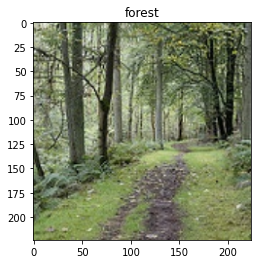

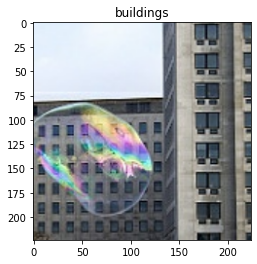

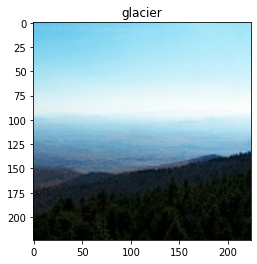

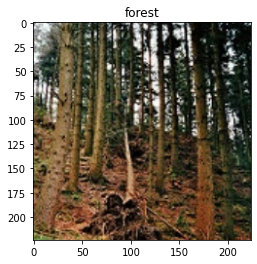

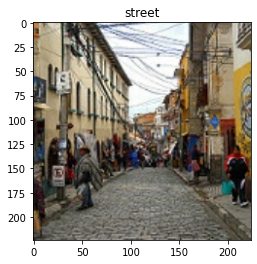

In [ ]:
for images,labels in train_ds.take(5):
  plt.imshow(images[0].numpy().astype('uint8')) #배치당 첫번째 이미지만 out, numpy array 형태로 바꿈
  plt.title(class_list[labels[0].numpy()])
  plt.show() #5번만 읽어오기

In [ ]:
#######6
#Pretrained MobileNetV3로 Training 하기

In [ ]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
mobilenetv3=MobileNetV3Small(weights='imagenet',include_top=False, input_shape=(Res,Res,3))

4334752/4334752 [==============================] - 0s 0us/step


In [ ]:
mobilenetv3.summary()

In [ ]:
#6개의 class분류 모델 만들기 시작

In [ ]:
def create_model():
  inputs=keras.Input(shape=(Res,Res,3))
  x=preprocess_input(inputs)
  x=mobilenetv3(x)
  x=GlobalAveragePooling2D()(x)
  x=Dense(6)(x)
  x=BatchNormalization()(x)
  outpus=Softmax()(x)
  model=keras.Model(inputs=inputs,outputs=outpus)
  return model


In [ ]:
model=create_model()

In [ ]:
model.compile(keras.optimizers.SGD(learning_rate=LR),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy']) #model 파라미터 설정

In [ ]:
model.fit(train_ds,epochs=1,validation_data=val_ds)

439/439 [==============================] - 61s 107ms/step - loss: 1.2104 - accuracy: 0.5514 - val_loss: 0.9509 - val_accuracy: 0.7107


In [ ]:
model=create_model()

In [ ]:
model.compile(keras.optimizers.Adam(learning_rate=0.0005),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
439/439 [==============================] - 54s 112ms/step - loss: 0.5260 - accuracy: 0.8893 - val_loss: 0.4373 - val_accuracy: 0.9110
Epoch 2/5
439/439 [==============================] - 46s 105ms/step - loss: 0.3638 - accuracy: 0.9292 - val_loss: 0.3470 - val_accuracy: 0.9193
Epoch 3/5
439/439 [==============================] - 48s 108ms/step - loss: 0.2850 - accuracy: 0.9468 - val_loss: 0.3604 - val_accuracy: 0.9240
Epoch 4/5
439/439 [==============================] - 46s 105ms/step - loss: 0.2235 - accuracy: 0.9592 - val_loss: 0.3210 - val_accuracy: 0.9150
Epoch 5/5
439/439 [==============================] - 47s 106ms/step - loss: 0.1887 - accuracy: 0.9649 - val_loss: 0.3471 - val_accuracy: 0.9063


In [ ]:
#모델 성능 올리기

In [ ]:
#Data Augmantation

In [ ]:
RES_BEF=256
N_EPOCH=8

In [ ]:
#224->256으로 이미지 사이즈 늘리고 224로 다시 잘라주는 줘야함

train_ds=keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=(RES_BEF,RES_BEF),
    batch_size=batch_size
)

Found 14034 files belonging to 6 classes.


In [ ]:
#256사이즈 이미지 224로 Crop

def aug(image,label):
  image=tf.image.random_crop(image,[Res,Res,3])
  image=tf.image.random_flip_left_right(image)
  return image, label

In [ ]:
train_ds=train_ds.unbatch().map(aug,num_parallel_calls=AUTOTUNE).batch(batch_size,drop_remainder=True).prefetch(AUTOTUNE) #unbatch=배치를 풀어줌, drop_remainder=배치사이즈로 가다가 남는 데이터는 버려줌->셔플되니까 큰상관 X

In [ ]:
model=create_model()

In [ ]:
model.compile(keras.optimizers.Adam(learning_rate=0.0005),loss=keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
model.fit(train_ds,epochs=1,validation_data=val_ds) #data를 늘렸기 때문에 epoch수를 조금 늘려서 학습

438/438 [==============================] - 59s 116ms/step - loss: 0.5558 - accuracy: 0.8751 - val_loss: 0.4988 - val_accuracy: 0.8947


In [ ]:
## cutmix 알고리즘 구현

In [ ]:
# 참고 논문 https://arxiv.org/abs/1905.04899
# cutmix는 개와 고양이의 얼굴부분을 바꾸는 등의 data augmentation 방법임

In [ ]:
# 데이터는 one-hot encoding이 되어있어야함
# one hot encoding이란 0으로 이루어진 백터에서 단 한개의 1값으로 데이터를 구분하는 방법임.

In [ ]:
for images, labels in train_ds.take(6):
  print(labels[0].numpy())

2
1
4
5
5
3


In [ ]:
# one hot encoding 진행
train_ds=keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=(RES_BEF,RES_BEF),
    label_mode='categorical', #one hot encoding으로 해줌
    batch_size=batch_size,
)

val_ds=keras.preprocessing.image_dataset_from_directory(
    val_dir,
    shuffle=False,
    image_size=(Res,Res),
    label_mode='categorical',
    batch_size=batch_size
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [ ]:
for images, labels in train_ds.take(6):
  print(labels[0].numpy())

[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0.]


In [ ]:
'''
tf.clip_by_value(
    t, clip_value_min, clip_value_max, name=None
)
'''

'\ntf.clip_by_value(\n    t, clip_value_min, clip_value_max, name=None\n)\n'

In [ ]:
tf.random.uniform((),0,1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5742116>

In [ ]:
images[0]

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[179.       , 189.       , 198.       ],
        [181.27344  , 191.27344  , 200.27344  ],
        [184.78906  , 194.78906  , 203.78906  ],
        ...,
        [208.       , 212.       , 221.       ],
        [208.       , 212.       , 221.       ],
        [208.       , 212.       , 221.       ]],

       [[182.03125  , 192.03125  , 201.03125  ],
        [184.16112  , 194.16112  , 203.16112  ],
        [187.45473  , 197.45473  , 206.45473  ],
        ...,
        [208.3789   , 212.3789   , 221.3789   ],
        [208.3789   , 212.3789   , 221.3789   ],
        [208.3789   , 212.3789   , 221.3789   ]],

       [[186.71875  , 196.71875  , 205.71875  ],
        [188.6266   , 198.6266   , 207.6266   ],
        [191.57689  , 201.57689  , 210.57689  ],
        ...,
        [208.96484  , 212.96484  , 221.96484  ],
        [208.96484  , 212.96484  , 221.96484  ],
        [208.96484  , 212.96484  , 221.96484  ]],

       ...,

     

In [ ]:
def cutmix(images,labels):
  imgs=[]; labs=[]
  for i in range(batch_size):
    APPLY = tf.cast(tf.random.uniform(())>=0.5,tf.int32) #참 거짓에 따라 1,0을 반환해줌 , 유니폼 분포에서 0보다 큰값이 나오면 해당 이미지에 Cutmix 적용
    idx=tf.random.uniform((),0,batch_size,tf.int32) #컷해줄 이미지 고르는 index값

    W=Res #이미지 width
    H=Res #이미지 height
    lam=tf.random.uniform(()) #람다값
    cut_ratio=tf.math.sqrt(1.-lam) #random으로 얼마나 자를 것 인지.
    cut_w=tf.cast(W*cut_ratio,tf.int32)*APPLY #224Xcut ratio width를 얼마나 자를 것인지->정수값으로
    cut_h=tf.cast(H*cut_ratio,tf.int32)*APPLY #224xcut ratio height를 얼마나 자를 것인지->정수값으로

    cx=tf.random.uniform((),int(W/8),int(7/8*W),tf.int32) #x센터점
    cy=tf.random.uniform((),int(H/8),int(7/8*H),tf.int32) #y센터점

    xmin=tf.clip_by_value(cx-cut_w//2,0,W) #// 정수나오도록, 0보다 작으면0, 224보다 크면 224로 나오게
    ymin=tf.clip_by_value(cy-cut_h//2,0,H) #위와 마찬가지
    xmax=tf.clip_by_value(cx+cut_w//2,0,W)
    ymax=tf.clip_by_value(cy+cut_h//2,0,H)

    #cut mix 적용
    #images shape=(batch size, H, W, Channel)->(32,256,256,3)
    mid_left=images[i,ymin:ymax,:xmin,:] #i는 cutmix대상 이미지
    mid_mid=images[idx,ymin:ymax,xmin:xmax,:] #idx는 자를 이미지
    mid_right=images[i,ymin:ymax,xmax:,:]
    middle=tf.concat([mid_left,mid_mid,mid_right],axis=1) #x축 방향으로 이어붙여줌
    top=images[i,:ymin,:,:]
    bottom=images[i,ymax:,:,:]
    new_img=tf.concat([top,middle,bottom],axis=0) #y축 방향으로 이어붙여줌
    imgs.append(new_img)

    cut_w_mod=xmax-xmin #짤려서 들어온 이미지의 넓이
    cut_h_mod=ymax-ymin #짤려서 들어온 이미지의 높이
    alpha=tf.cast((cut_w_mod*cut_h_mod)/(W*H),tf.float32) #짜를이미지의 비율
    label1=labels[i] #원래이미지 라벨값
    label2=labels[idx] #짤라올 이미지 라벨값
    new_label=((1-alpha)*label1+alpha*label2) #각각의 레이블값을 섞어줌
    labs.append(new_label) #라벨값 합쳐줌
  new_imgs=tf.reshape(tf.stack(imgs),[-1,Res,Res,3]) #이미지 스택으로 쌓아줌
  new_labs=tf.reshape(tf.stack(labs),[-1,6])

  return new_imgs,new_labs

In [ ]:
# cutmix 적용
#배치 풀고 aug함수 먼저 적용하고->배치 다시 적용->cutmix적용함.
#aug함수는 256으로 이미지를 crop하고 좌우로 회전시키는 함수
#cutmix는 다른 사진을 잘라서 잘린 부분에 붙여주는 것

train_ds=train_ds.unbatch().map(aug,num_parallel_calls=AUTOTUNE).batch(batch_size,drop_remainder=True).map(cutmix,num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

[0.         0.         0.         0.5102041  0.         0.48979592]


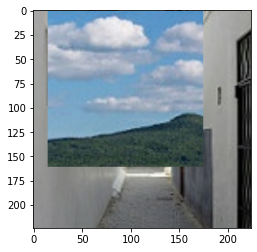

[1. 0. 0. 0. 0. 0.]


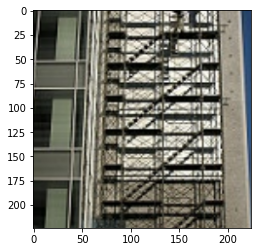

[1. 0. 0. 0. 0. 0.]


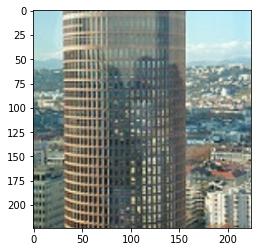

[0.        0.        0.5996891 0.        0.4003109 0.       ]


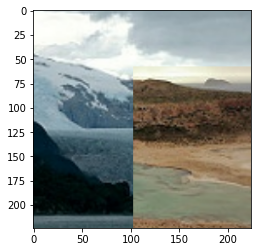

[0. 0. 1. 0. 0. 0.]


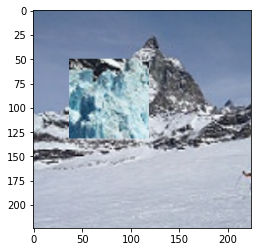

In [ ]:
for images, labels in train_ds.take(5):
  plt.imshow(images[0].numpy().astype('uint8'))
  print(labels[0].numpy())
  plt.show()

In [ ]:
# cutmix data로 Train

In [ ]:
model=create_model()

In [ ]:
model.compile(keras.optimizers.Adam(learning_rate=0.0005),loss=keras.losses.CategoricalCrossentropy(),metrics=['accuracy']) #loss바뀜 categirucakcrissentropy로

In [ ]:
model.fit(train_ds,epochs=1,validation_data=val_ds)

438/438 [==============================] - 64s 135ms/step - loss: 0.7690 - accuracy: 0.8130 - val_loss: 0.4392 - val_accuracy: 0.9003


In [ ]:
# 이미지 크기 키워서 성능더 높이기

In [ ]:
'''
256->320으로 이미지 키우기
random crop하기전 사이지는 330
330에서 320으로 Crop
data aug는 똑같이 적용해줌
'''

'\n256->320으로 이미지 키우기\nrandom crop하기전 사이지는 330\n330에서 320으로 Crop\ndata aug는 똑같이 적용해줌\n'

In [ ]:
Res_Bef_1=330
Res=320
N_class=6
batch_size=32
epoch=10
lr=0.0005

In [ ]:
train_ds=keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size=(Res_Bef_1,Res_Bef_1),
    label_mode='categorical', #one hot encoding으로 해줌
    batch_size=batch_size,
)

val_ds=keras.preprocessing.image_dataset_from_directory(
    val_dir,
    shuffle=False,
    image_size=(Res,Res),
    label_mode='categorical',
    batch_size=batch_size
)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [ ]:
train_ds=train_ds.unbatch().map(aug,num_parallel_calls=AUTOTUNE).batch(batch_size,drop_remainder=True).map(cutmix,num_parallel_calls=AUTOTUNE).prefetch(AUTOTUNE)

In [ ]:
for images, labels in train_ds.take(5):
  plt.imshow(images[0].numpy().astype('uint8'))
  print(labels[0].numpy())
  plt.show()

In [ ]:
images[0]

In [ ]:
# Learning rate warmup+cosine decay구현하기

In [ ]:
'''
Learning rate warmup
raining이 시작될 때, 모든 parameters들은 보통 random values(initialized)이므로,
최종 solution에서 멀리 떨어져 있다.
이 때, 너무 큰 learning rate를 사용하면 numerical instability가 발생할 수 있기에,
초기에 작은 learning rate를 사용하고, training과정이 안정되면 초기 learning rate로 전환하는 방법
학습률은 하나의 수치로 가는 것 보다 동적으로 변경해주며 하는 것이 학습에 더 도움이 됨.

cosine decay는
학습율 스케쥴러로서,
학습율의 최대값과 최소값을 정해서 
그 범위의 학습율을 코싸인 함수를 
이용하여 스케쥴링하는 방법이다

max_lr=최대 learning rate
warmup_steps는 warm up이 끝나는 step수
warmup이란 weight가 어느정도 안정될 때 까지
초기에 설정한 learning rate로 학습을 진행한다는 것.
보통 epoch 5까지 warm up을 적용시켜 학습을 안정시켜줌
decay steps란 크게 준 learning rate를 특정 epoch에서 감소시는 것을 의미함
'''

'\nLearning rate warmup\nraining이 시작될 때, 모든 parameters들은 보통 random values(initialized)이므로,\n최종 solution에서 멀리 떨어져 있다.\n이 때, 너무 큰 learning rate를 사용하면 numerical instability가 발생할 수 있기에,\n초기에 작은 learning rate를 사용하고, training과정이 안정되면 초기 learning rate로 전환하는 방법\n학습률은 하나의 수치로 가는 것 보다 동적으로 변경해주며 하는 것이 학습에 더 도움이 됨.\n\ncosine decay는\n학습율 스케쥴러로서,\n학습율의 최대값과 최소값을 정해서 \n그 범위의 학습율을 코싸인 함수를 \n이용하여 스케쥴링하는 방법이다\n\nmax_lr=최대 learning rate\nwarmup_steps는 warm up이 끝나는 step수\nwarmup이란 weight가 어느정도 안정될 때 까지\n초기에 설정한 learning rate로 학습을 진행한다는 것.\n보통 epoch 5까지 warm up을 적용시켜 학습을 안정시켜줌\ndecay steps란 크게 준 learning rate를 특정 epoch에서 감소시는 것을 의미함\n'

In [ ]:
class CustomSchedule(keras.optimizers.schedules.LearningRateSchedule):
  def __init__(self,max_lr,warmup_steps,decay_steps):
    super(CustomSchedule,self).__init__()
    self.max_lr=max_lr
    self.warmup_steps=warmup_steps
    self.decay_steps=decay_steps

  def __call__(self,step):
    #lr을 warm up step보다 step이 작으면 학습률을 아주 작은값에서 부터 max learning rate까지 증가시켜줌
    lr=tf.cond(step<self.warmup_steps,
               lambda: self.max_lr/self.warmup_steps*step, #True일때
               lambda: 0.5*(1+tf.math.cos(math.pi * (step-self.warmup_steps)/self.decay_steps))*self.max_lr) #False일때
    return lr

In [ ]:
# Learning rate scheduling visaulization

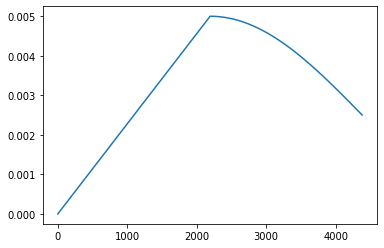

In [ ]:
steps_per_epoch=N_Train//batch_size

lr_schedule=CustomSchedule(0.005,5*steps_per_epoch,10*steps_per_epoch) #max learning rate은 0.005, 5 epoch까지 warm up, 10 step까지 학습률 점차 줄이며 학습
lr=[]
for step in range(steps_per_epoch*10):
  lr.append(lr_schedule(step))

step_list=list(np.arange(steps_per_epoch*10)+1) #arange는 0을 포함하기 때문에 +1해줌
plt.plot(step_list,lr)
plt.show()

In [ ]:
# Label Smoothing 적용하여 학습진행

In [ ]:
mobilenetv3=MobileNetV3Small(weights='imagenet',include_top=False, input_shape=(Res,Res,3))

In [ ]:
model=create_model()

In [ ]:
lr_schedule=CustomSchedule(0.005,3*steps_per_epoch,20*steps_per_epoch)
model.compile(keras.optimizers.Adam(lr_schedule),loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),metrics=['accuracy'])

# label smoothing이란 데이터 정규화(regularization) 테크닉 가운데 하나
# [0,1,0,0]->label smoothing 0.1적용하면 ->[0.025,0.925,0.025,0.025]->정답값을 제외하고 균일한 값을 넣어준다고 생각하면됨.

In [ ]:
model.fit(train_ds,epochs=20,validation_data=val_ds)

Epoch 1/20
438/438 [==============================] - 93s 195ms/step - loss: 1.0644 - accuracy: 0.7440 - val_loss: 0.8792 - val_accuracy: 0.8373
Epoch 2/20
438/438 [==============================] - 85s 194ms/step - loss: 0.9155 - accuracy: 0.8106 - val_loss: 3.4405 - val_accuracy: 0.2190
Epoch 3/20
438/438 [==============================] - 84s 191ms/step - loss: 0.9024 - accuracy: 0.8144 - val_loss: 6.8473 - val_accuracy: 0.3673
Epoch 4/20
438/438 [==============================] - 86s 195ms/step - loss: 0.8885 - accuracy: 0.8207 - val_loss: 12.2247 - val_accuracy: 0.2367
Epoch 5/20
438/438 [==============================] - 85s 193ms/step - loss: 0.8786 - accuracy: 0.8264 - val_loss: 9.2839 - val_accuracy: 0.2107
Epoch 6/20
438/438 [==============================] - 85s 193ms/step - loss: 0.8619 - accuracy: 0.8355 - val_loss: 10.3970 - val_accuracy: 0.2300
Epoch 7/20
438/438 [==============================] - 86s 194ms/step - loss: 0.8572 - accuracy: 0.8365 - val_loss: 3.6002 - val_

KeyboardInterrupt: ignored

In [ ]:
# learning rate decay 적용하여 학습하기(계단식으로 학습률 떨어뜨리기)

In [ ]:
model=create_model()
lr_schedule=keras.optimizers.schedules.ExponentialDecay(LR,steps_per_epoch*3,0.1,True)

model.compile(keras.optimizers.Adam(lr_schedule),loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),metrics=['accuracy'])
model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
438/438 [==============================] - 91s 197ms/step - loss: 0.8441 - accuracy: 0.8589 - val_loss: 0.6667 - val_accuracy: 0.8980
Epoch 2/10
438/438 [==============================] - 84s 190ms/step - loss: 0.7784 - accuracy: 0.8809 - val_loss: 0.6057 - val_accuracy: 0.9203
Epoch 3/10
438/438 [==============================] - 83s 187ms/step - loss: 0.7635 - accuracy: 0.8862 - val_loss: 0.6082 - val_accuracy: 0.9247
Epoch 4/10
438/438 [==============================] - 83s 189ms/step - loss: 0.7449 - accuracy: 0.8926 - val_loss: 0.5651 - val_accuracy: 0.9397
Epoch 5/10
438/438 [==============================] - 84s 189ms/step - loss: 0.7331 - accuracy: 0.9041 - val_loss: 0.5560 - val_accuracy: 0.9423
Epoch 6/10
438/438 [==============================] - 84s 191ms/step - loss: 0.7306 - accuracy: 0.9060 - val_loss: 0.5542 - val_accuracy: 0.9433
Epoch 7/10
438/438 [==============================] - 82s 186ms/step - loss: 0.7285 - accuracy: 0.9090 - val_loss: 0.5533 - val_ac